# Capstone Project - The Battle of Neighborhoods

## 1. Description of the Problem and a Discussion of the Background

### 1.1. Introduction to the Business Problem


Usually, investors are looking to minimize the risk of an investment, so they look for information (processed data) that will allow you to narrow the evaluation to make your investment decision. The location analysis and the determination of the variables and characteristics that allow to determine the selection of an investment in a business of type of commercial or services is important. The support and provide of this characterization and location patterns of a business that allows to limit the investment risk is decisive today especially if the objective is of small or medium investors who need to project potential income and expenses of the selected alternative.
This project attempts to provide as a result and achieve the following objectives:

* Characterization and segmentation of New York Neighborhoods based on commercial premises (sale of products or services) around the study centers.
* Recognize patterns of expiration associated with the central focus of the study centers. Is it important to invest in a cafeteria or gym around a university or a college, associated with the number of people and businesses associated with a study center?
* Discreet labeling of business groups around education institutions. This classification is characteristic of the variables and location of the observations of the dataset used.

For this we will apply a K-means Cluster model to the data set of the New York education institutions as a case that can be extended to other cities.

### 1.2. Business Problem
This approach of the "The Battle of Neighborhoods" project is to provide quality and timely information to reduce the risk of investors in businesses that can be developed or acquired in neighboring neighborhoods to educational institutions.
The questions we could answer are:
* (a) What are the top n businesses (5,10) that are developed around a university, considering its population, location?
* (b) What types of businesses are developed around schools for children? 

and other questions 

### 1.3. Interested audience

The interest groups are varied which can be people or institutions that can use the results of the Cluster model, such as those indicated:
* Investors in small and medium businesses, have data that determine the types of businesses that are developed around Education Institutions.
* Professional evaluation of economic development of neighborhoods of a city, using the characterization of clusters.
* Companies looking for (local) locations to install franchise-based businesses (Starkbucs, Subway, Pizza Hut ...)
* Financial Companies to evaluate and limit risks associated with loans to investors who wish to invest in neighborhoods associated with this project.
* Real Estate Companies for the sustained development of real estate construction or renovation projects in the neighborhoods associated with the results of the clusterization.

## 2. Description of the data and use in solving the problem

For this project, we will use a K Means Grouping model, to group types of businesses located around the United States Study Centers, specifically New York. The data source is the website of "Homeland Infrastructure Foundation-Level Data (HIFLD)" which considers as Centers of Studies to Universities, Colleges, Institutes, for our case we consider the data to this reference of the city of New York.

The Source is https://hifld-geoplatform.opendata.arcgis.com/datasets/colleges-and-universities, we will use a data frame with 7150 observations in the following 45 variables (Last update 2 months ago).

<table border="1">
    <caption><H3><b>DataSet Columns</b></H3></caption>
	<tr><th>Columns/ Type (1-15)</th> <th>Columns/ Type (16-30)</th> <th>Columns/ Type (31-45)</th>	</tr>
	<tr><td>X, type number </td><td>COUNTYFIPS, Int64.Type</td> <td>HI_OFFER, Int64.Type</td></tr>
    <tr><td>Y, type number </td><td>COUNTRY, type text</td><td>DEG_GRANT, Int64.Type</td></tr>
    <tr><td>OBJECTID, Int64.Type </td> <td>LATITUDE, type number</td><td>LOCALE, Int64.Type</td></tr>
    <tr><td>IPEDSID, Int64.Type </td> <td>LONGITUDE, type number</td><td>CLOSE_DATE, type text</td></tr>
    <tr><td>NAME, type text </td> <td>NAICS_CODE, Int64.Type</td><td>MERGE_ID, Int64.Type</td></tr>
   	<tr><td>ADDRESS, type text</td><td>NAICS_DESC, type text</td> <td>ALIAS, type text</td></tr>
    <tr><td>CITY, type text</td><td>SOURCE, type text</td><td>SIZE_SET, Int64.Type</td></tr>
    <tr><td>STATE, type text</td> <td>SOURCEDATE, type datetime</td><td>INST_SIZE, Int64.Type</td></tr>
    <tr><td>ZIP, Int64.Type</td> <td>VAL_METHOD, type text</td><td>PT_ENROLL, Int64.Type</td></tr>
    <tr><td>ZIP4, type text</td> <td>VAL_DATE, type datetime</td><td>FT_ENROLL, Int64.Type</td></tr>
    <tr><td>TELEPHONE, type text</td><td>WEBSITE, type text</td> <td>TOT_ENROLL, Int64.Type</td></tr>
    <tr><td>TYPE, Int64.Type </td><td>STFIPS, Int64.Type</td><td>HOUSING, Int64.Type</td></tr>
    <tr><td>STATUS, type text</td> <td>COFIPS, Int64.Type</td><td>DORM_CAP, Int64.Type</td></tr>
    <tr><td>POPULATION, Int64.Type </td> <td>SECTOR, Int64.Type</td><td>TOT_EMP, Int64.Type</td></tr>
    <tr><td>COUNTY, type text</td> <td>LEVEL_, Int64.Type</td><td>SHELTER_ID, type text</td></tr>
</table>

There are variables of the DataSet that does not contribute to the analysis of business characterization that one wishes to obtain from the data, such as columns X and Y, which are LATITUDE and LONGITUDE.
Additionally we will add data from FOURSQUARE, about neighboring locations to selected study centers in New York City.

### Description of columns to use

| Column Name   | Type          | Description                                            | 
| :------------ | :------------ | :----------------------------------------------------- | 
| ADDRESS       | Text    | The Dirección de una institución educativa de EEUU, which is unique. | 
| NAME | Text   | Name of the education institution. |
| CITY	        | Text   | City where the institution is located. |
| STATE	        | Text   | State where the institution is located. |
| TYPE	        | Int    | educational level classification. |
| POPULATION    | Int    | Población del Centro de estudios. |
| LATITUDE	    | Float  | Geospatial Coordinate. |
| LONGITUDE     | Float  | Geospatial Coordinate. |
| NAICS_DESC    | Text   | Description of the NAICS Classification of the Studies Center. |
| LEVEL_	    | Int    | Group codes that indicate, 1: Colleges, Universities, 2: Kindergarten, Children schools, 3: Specialties such as Computing, Cosmetology and others. |
| TOT_ENROLL    | Int    | Number of people enrolled. |
| TOT_EMP       | Int    | Number of employees of the institution. |



## 3. Methodology

As mentioned earlier we will use the * k-means * model, which is widely used for grouping in many data science applications, especially useful if you need to quickly discover information from unlabeled data as is the case.
* Data Acquisition Source: Understand in recovering the data from the file "Colleges_and_Universities.csv"
* Data Wrangling: process of converting data from its initial format to a format suitable for analysis.
* Exploratory analysis: processes that allow us to understand the data for the conformation of the dataset that will be used in the intake of the model and its evaluation. At this stage we consider the aggregation of data from neighboring premises to the centers of studies, and which are obtained from FOURSQUARE.
* Model and evaluation: We will apply the "K-means" model and evaluate with score metrics 
* Results: We will show the clusters obtained with the data associated with each one, which represent the characterization of the grouping, we will indicate some interpretations of its applicability oriented to groups of people of interest.
* Report Conclusions: final stage of the project where we present the conclusions based on the objectives and the openness to improve the use of this information to other stakeholders.


## 3.1. Data Acquisition Source

#### *For the case development the phases of data acquisition, Data Wrangling (Cleaning, Transformation basic statistical analysis) was performed previously. In this notebook we will see Data Analysis, Cluster Modeling, data visualization on geographical maps and Interpretation of results obtained.*

In [1]:
# Import required libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json # library to handle JSON files
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# import k-means from clustering stage
from sklearn.cluster import KMeans    

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## 3.2. Data Wrangling

In [2]:
#Recover data file and select from rows (observations) with New York criteria
neighborhoods=pd.read_csv('Colleges_and_Universities.csv')
nydata=neighborhoods[neighborhoods['STATE']=='NY'] ##.set_index()
nydata=nydata[nydata['CITY']=='NEW YORK']
nydata= nydata[nydata['CITY'].str.contains('', na = False)].reset_index(drop=True)
nydata.head()

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STFIPS,COFIPS,SECTOR,LEVEL_,HI_OFFER,DEG_GRANT,LOCALE,CLOSE_DATE,MERGE_ID,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,-73.991271,40.713812,7006,193070,MESIVTHA TIFERETH JERUSALEM OF AMERICA,145 E BROADWAY,NEW YORK,NY,10002,6301,(212) 964-2830,2,A,81,NEW YORK,36061,USA,40.713812,-73.991271,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2016-07-01T00:00:00.000Z,mtj.edu,36,061,2,1,9,1,11,-2,-2,NOT AVAILABLE,6,1,-999,69,69,1,146,12,NOT AVAILABLE
1,-73.980278,40.751893,133,447430,CARSTEN INSTITUTE OF COSMETOLOGY,290 MADISON AVENUE 5TH FLOOR,NEW YORK,NY,10017,NOT AVAILABLE,(212) 675-4884,3,A,108,NEW YORK,36061,USA,40.751893,-73.980278,611511,COSMETOLOGY AND BARBER SCHOOLS,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-03-26T00:00:00.000Z,carsten.edu,36,061,9,3,2,2,11,-2,-2,NOT AVAILABLE,-2,1,53,41,94,2,-999,14,NOT AVAILABLE
2,-73.987638,40.772309,309,188854,AMERICAN MUSICAL AND DRAMATIC ACADEMY,211 WEST 61ST STREET,NEW YORK,NY,10023,NOT AVAILABLE,(212) 787-5300 EXT 3331,2,A,1962,NEW YORK,36061,USA,40.772309,-73.987638,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-01-28T00:00:00.000Z,www.amda.edu,36,061,2,1,5,1,11,-2,-2,NOT AVAILABLE,11,2,-999,1515,1515,1,941,447,NOT AVAILABLE
3,-73.979434,40.753993,310,189228,BERKELEY COLLEGE-NEW YORK,3 EAST 43 STREET,NEW YORK,NY,10017,NOT AVAILABLE,(212) 986-4343,3,A,4155,NEW YORK,36061,USA,40.753993,-73.979434,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-01-28T00:00:00.000Z,www.BerkeleyCollege.edu,36,061,3,1,5,1,11,-2,-2,BERKELEY COLLEGE NYC CAMPUS | BERKELEY COLLEGE...,12,2,876,2759,3635,2,-999,520,NOT AVAILABLE
4,-73.973595,40.750855,314,190035,CUNY SYSTEM OFFICE,205 EAST 42ND STREET,NEW YORK,NY,10017,NOT AVAILABLE,(646) 664-3300,1,A,1184,NEW YORK,36061,USA,40.750855,-73.973595,611710,EDUCATIONAL SUPPORT SERVICES,https://nces.ed.gov/GLOBALLOCATOR/col_info_pop...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2019-01-28T00:00:00.000Z,www2.cuny.edu/,36,061,0,1,8,1,11,-2,-2,CUNY CENTRAL OFFICE | CUNY CENTRAL | THE CITY ...,-2,-2,-999,-999,-999,-2,-999,1184,NOT AVAILABLE


### Preprocessing

In [3]:
# Subseting columns, exclude redundant variables
nydata= nydata[['ADDRESS','NAME','TYPE','STATUS','POPULATION','LATITUDE','LONGITUDE','NAICS_DESC','SECTOR','LEVEL_','HI_OFFER','INST_SIZE','TOT_ENROLL','HOUSING','DORM_CAP','TOT_EMP']]
nydata.shape

(86, 16)

In [4]:
# List of Variables and their types of data
nydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 16 columns):
ADDRESS       86 non-null object
NAME          86 non-null object
TYPE          86 non-null int64
STATUS        86 non-null object
POPULATION    86 non-null int64
LATITUDE      86 non-null float64
LONGITUDE     86 non-null float64
NAICS_DESC    86 non-null object
SECTOR        86 non-null int64
LEVEL_        86 non-null int64
HI_OFFER      86 non-null int64
INST_SIZE     86 non-null int64
TOT_ENROLL    86 non-null int64
HOUSING       86 non-null int64
DORM_CAP      86 non-null int64
TOT_EMP       86 non-null int64
dtypes: float64(2), int64(10), object(4)
memory usage: 10.9+ KB


## 3.3. Exploratory Analysis
We will apply Data Analysis and Visual Analysis, to achieve the best understanding of the data, in this process we will define adapted datasets to understand what data sets represent with respect to the variables selected in the analysis.

In [5]:
# Descriptive statistics of the NY dataset
nydata.describe()

,TYPE,POPULATION,LATITUDE,LONGITUDE,SECTOR,LEVEL_,HI_OFFER,INST_SIZE,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.313953,4555.104651,40.755291,-73.983810,4.360465,1.686047,5.395349,1.546512,3284.965116,1.476744,-20.686047,1212.058140
std,0.673212,10997.498020,0.031007,0.018763,3.040560,0.857652,3.010879,1.289386,7954.533200,0.731264,2248.987899,3570.209898
min,1.000000,-999.000000,40.705781,-74.015157,0.000000,1.000000,1.000000,-2.000000,-999.000000,-2.000000,-999.000000,-999.000000
25%,2.000000,187.750000,40.739022,-73.995709,2.000000,1.000000,2.250000,1.000000,116.000000,1.000000,-999.000000,32.500000
50%,2.000000,673.500000,40.751103,-73.986724,3.000000,1.000000,5.000000,1.000000,471.000000,2.000000,-999.000000,123.500000
75%,3.000000,2089.500000,40.766428,-73.972839,7.500000,2.750000,9.000000,2.000000,1438.250000,2.000000,218.000000,634.000000
max,3.000000,73997.000000,40.850800,-73.928541,9.000000,3.000000,9.000000,5.000000,51123.000000,2.000000,13075.000000,22874.000000


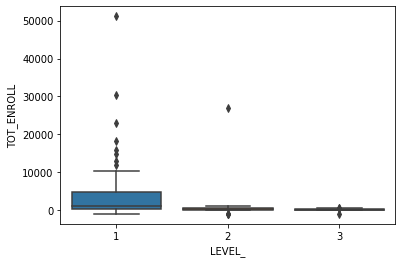

In [6]:
# Boxplot chart for bi-variable analysis
sns.boxplot(x='LEVEL_',y='TOT_ENROLL',data=nydata)

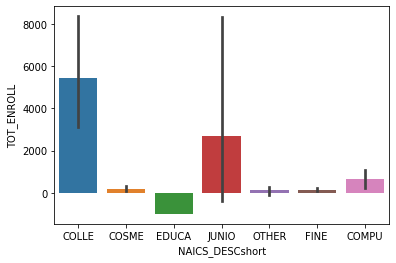

In [7]:
# Barplot chart for Analysis of three variables with grouping of one in NAICS classification
typeeduc =nydata
typeeduc['NAICS_DESCshort']=typeeduc['NAICS_DESC'].str[0:5].astype(str) # Transform Column
sns.barplot(x='NAICS_DESCshort',y='TOT_ENROLL',data=typeeduc)

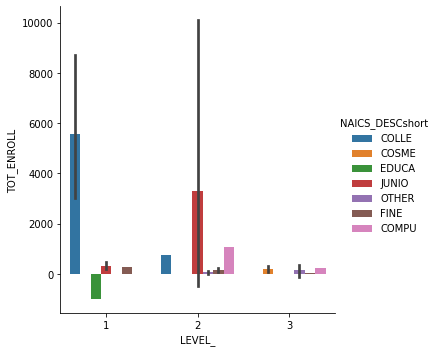

In [8]:
sns.catplot(x="LEVEL_", y="TOT_ENROLL", hue='NAICS_DESCshort', kind="bar", data=typeeduc)

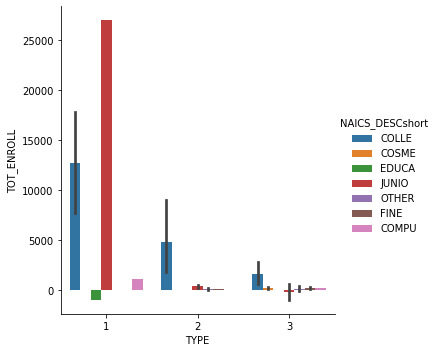

In [9]:
sns.catplot(x="TYPE", y="TOT_ENROLL", hue='NAICS_DESCshort', kind="bar", data=typeeduc)

In [10]:
# group education centers by clasificacion NAICS and apply sum() function 
df_type = nydata[['TYPE','TOT_ENROLL']].groupby('TYPE', axis=0).sum()
df_type['TOT_ENROLL'][df_type.TOT_ENROLL== -999] = 0
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_type.groupby('TYPE', axis=0)))
df_type

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,TOT_ENROLL
TYPE,
1,116061
2,151152
3,15294


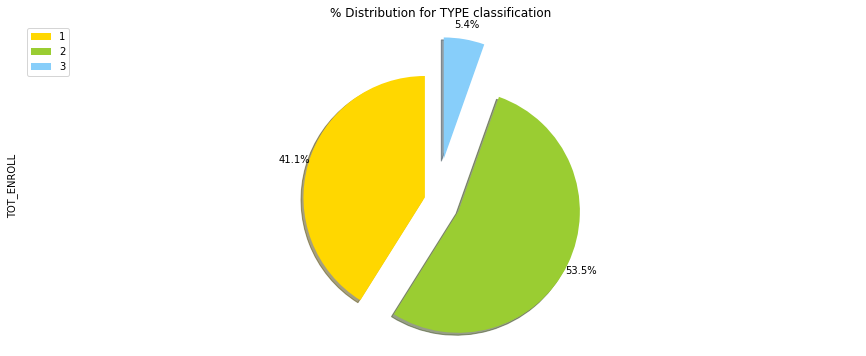

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightskyblue']
explode_list = [0.1, 0.2, 0.35] # ratio for each NAICS with which to offset each wedge.
# autopct create %, start angle represent starting point
df_type['TOT_ENROLL'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 NAICS
                            )

plt.title('% Distribution for TYPE classification')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_type.index, loc='upper left') 
plt.show()

In [12]:
# group education centers by clasificacion NAICS and apply sum() function 
df_naics = typeeduc[['NAICS_DESCshort','TOT_ENROLL']].groupby('NAICS_DESCshort', axis=0).sum()
df_naics['TOT_ENROLL'][df_naics.TOT_ENROLL== -999] = 0
# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_naics.groupby('NAICS_DESCshort', axis=0)))
df_naics

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,TOT_ENROLL
NAICS_DESCshort,
COLLE,251242
COMPU,1281
COSME,1460
EDUCA,0
FINE,764
JUNIO,27017
OTHER,1742


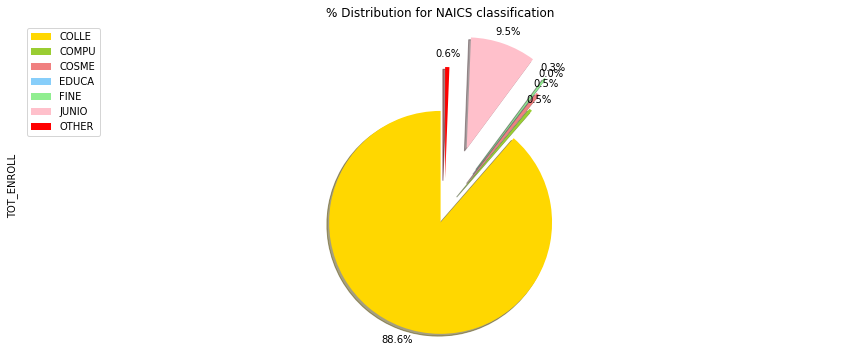

In [13]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0.1, 0.2, 0.35, 0.45, 0.5, 0.6,0.3] # ratio for each NAICS with which to offset each wedge.
# autopct create %, start angle represent starting point
df_naics['TOT_ENROLL'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 NAICS
                            )

plt.title('% Distribution for NAICS classification')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_naics.index, loc='upper left') 
plt.show()

In [14]:
# Top 10 educational centers by population
topn=nydata.sort_values('POPULATION',ascending=False)[:10]
#topn.reset_index(inplace=True)
topn

,ADDRESS,NAME,TYPE,STATUS,POPULATION,LATITUDE,LONGITUDE,NAICS_DESC,SECTOR,LEVEL_,HI_OFFER,INST_SIZE,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,NAICS_DESCshort
40,70 WASHINGTON SQ SOUTH,NEW YORK UNIVERSITY,2,A,73997,40.729452,-73.997264,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,5,51123,1,13075,22874,COLLE
51,WEST 116 ST AND BROADWAY,COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK,2,A,50144,40.808286,-73.961885,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,5,30454,1,12953,19690,COLLE
71,199 CHAMBERS ST,CUNY BOROUGH OF MANHATTAN COMMUNITY COLLEGE,1,A,30069,40.718790,-74.011826,JUNIOR COLLEGES,4,2,3,5,26932,2,-999,3137,JUNIO
36,695 PARK AVE,CUNY HUNTER COLLEGE,1,A,27003,40.768669,-73.964795,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,9,5,23005,1,650,3998,COLLE
21,ONE BERNARD BARUCH WAY (55 LEXINGTON AVE AT 24...,CUNY BERNARD M BARUCH COLLEGE,1,A,20836,40.740238,-73.983417,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,8,4,18289,1,414,2547,COLLE
72,160 CONVENT AVE,CUNY CITY COLLEGE,1,A,18746,40.819794,-73.950550,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,9,4,16001,1,590,2745,COLLE
46,524 W 59TH ST,CUNY JOHN JAY COLLEGE OF CRIMINAL JUSTICE,1,A,17160,40.770346,-73.988403,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,7,4,14834,1,176,2326,COLLE
25,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,2,A,16256,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,4,12986,1,3726,3270,COLLE
10,500 7TH AVENUE,TOURO COLLEGE,2,A,14505,40.753362,-73.989488,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,4,11908,1,388,2597,COLLE
9,66 WEST 12TH STREET,THE NEW SCHOOL,2,A,13736,40.735498,-73.997158,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,4,10389,1,1960,3347,COLLE


In [15]:
# Create a list of colours. 
# We have  list of the top 10 
colors = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]
ord= ['1','2','3','4','5','6','7','8','9','10']
# Add column 'colour' with colors to topn
topn['colour'] = colors
topn['orden'] = ord
#topn=topn.reset_index(drop=True)
topn

,ADDRESS,NAME,TYPE,STATUS,POPULATION,LATITUDE,LONGITUDE,NAICS_DESC,SECTOR,LEVEL_,HI_OFFER,INST_SIZE,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,NAICS_DESCshort,colour,orden
40,70 WASHINGTON SQ SOUTH,NEW YORK UNIVERSITY,2,A,73997,40.729452,-73.997264,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,5,51123,1,13075,22874,COLLE,red,1
51,WEST 116 ST AND BROADWAY,COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK,2,A,50144,40.808286,-73.961885,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,5,30454,1,12953,19690,COLLE,blue,2
71,199 CHAMBERS ST,CUNY BOROUGH OF MANHATTAN COMMUNITY COLLEGE,1,A,30069,40.718790,-74.011826,JUNIOR COLLEGES,4,2,3,5,26932,2,-999,3137,JUNIO,gray,3
36,695 PARK AVE,CUNY HUNTER COLLEGE,1,A,27003,40.768669,-73.964795,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,9,5,23005,1,650,3998,COLLE,orange,4
21,ONE BERNARD BARUCH WAY (55 LEXINGTON AVE AT 24...,CUNY BERNARD M BARUCH COLLEGE,1,A,20836,40.740238,-73.983417,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,8,4,18289,1,414,2547,COLLE,beige,5
72,160 CONVENT AVE,CUNY CITY COLLEGE,1,A,18746,40.819794,-73.950550,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,9,4,16001,1,590,2745,COLLE,green,6
46,524 W 59TH ST,CUNY JOHN JAY COLLEGE OF CRIMINAL JUSTICE,1,A,17160,40.770346,-73.988403,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",1,1,7,4,14834,1,176,2326,COLLE,purple,7
25,1 PACE PLAZA,PACE UNIVERSITY-NEW YORK,2,A,16256,40.711710,-74.004874,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,4,12986,1,3726,3270,COLLE,pink,8
10,500 7TH AVENUE,TOURO COLLEGE,2,A,14505,40.753362,-73.989488,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,4,11908,1,388,2597,COLLE,cadetblue,9
9,66 WEST 12TH STREET,THE NEW SCHOOL,2,A,13736,40.735498,-73.997158,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",2,1,9,4,10389,1,1960,3347,COLLE,black,10


In [16]:
data = topn
# Make an empty map
#m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=11)
 # Define NY's geolocation coordinates
ny_latitude = 40.7  
ny_longitude = -73.954

# Define the world map centered around NY with a higher zoom level   
ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

for lat, lng, label, co in zip(data['LATITUDE'], data['LONGITUDE'],data['orden'],data['colour']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        icon=folium.Icon(icon='cloud'),
        color=co,         
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(ny_map)


ny_map

# Save it as html
#ny_map.save('Topn_folium_map1.html')


<img align="left" style="padding-right:10px;" src="mapaNY01.jpg">

## 3.4. Model & Evaluation
### Data Wrangling for DataSet of Model
### Define Foursquare Credentials and Version to visualize dataframe and cluster in geospatial maps

##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [17]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


####  Using Foursquare API to explore the neighborhoods of one point

## 3.5. Results 
### Apply the Clusters model to the Neighborhood Dataframe

### Result of Applying K-means to New York Neighborhood dataframe in Clusters

#### View clusters on map of US - New York

## 3.6. Report Conclusions

#### Author: Alfonso Pereda G.